# Data Collection

In [1]:
# Retreive the Homicide Dataset from Toronto Open Data API

import requests

base_url = "https://ckan0.cf.opendata.inter.prod-toronto.ca"

# Datasets are called "packages". Each package can contain many "resources"
url = base_url + "/api/3/action/package_show"
params = { "id": "police-annual-statistical-report-homicide"}
package = requests.get(url, params = params).json()


# To get resource data:
for idx, resource in enumerate(package["result"]["resources"]):

    # For datastore_active resources:
    if resource["datastore_active"]:

        # To get all records in CSV format:
        url = base_url + "/datastore/dump/" + resource["id"]
        try:
            resource_dump_data = requests.get(url).text
            # Success message
            print("Data retrieved successfully.")
        except requests.exceptions.RequestException as e:
            # Error message
            print(f"Error retrieving data: {e}")        

Data retrieved successfully.


In [2]:
# Create pandas Dataframe

import pandas as pd
from io import StringIO

# read csv file into pandas dataframe
csv_file = StringIO(resource_dump_data)
data = pd.read_csv(csv_file)

# Print the DataFrame
data.head()

,_id,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_DOY,DIVISION,HOMICIDE_TYPE,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,geometry
0,1,GO-2004111878,1073106000000,2004,January,3,Saturday,3,D53,Other,98,Rosedale-Moore Park,98,Rosedale-Moore Park (98),"{""type"": ""Point"", ""coordinates"": [-79.39282836..."
1,2,GO-2004125755,1073538000000,2004,January,8,Thursday,8,D42,Shooting,142,Woburn North,137,Woburn (137),"{""type"": ""Point"", ""coordinates"": [-79.23385202..."
2,3,GO-2004136086,1073538000000,2004,January,8,Thursday,8,D42,Shooting,146,Malvern East,132,Malvern (132),"{""type"": ""Point"", ""coordinates"": [-79.20557418..."
3,4,GO-2004148623,1075006800000,2004,January,25,Sunday,25,D13,Shooting,171,Junction-Wallace Emerson,93,Dovercourt-Wallace Emerson-Junction (93),"{""type"": ""Point"", ""coordinates"": [-79.43438732..."
4,5,GO-2004148619,1075006800000,2004,January,25,Sunday,25,D42,Shooting,144,Morningside Heights,131,Rouge (131),"{""type"": ""Point"", ""coordinates"": [-79.20495811..."


# Exploratory data analysis (EDA)

In [3]:
# Retrieve list of columns, their data types, and information about missing values.
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   _id                1414 non-null   int64 
 1   EVENT_UNIQUE_ID    1414 non-null   object
 2   OCC_DATE           1414 non-null   int64 
 3   OCC_YEAR           1414 non-null   int64 
 4   OCC_MONTH          1414 non-null   object
 5   OCC_DAY            1414 non-null   int64 
 6   OCC_DOW            1414 non-null   object
 7   OCC_DOY            1414 non-null   int64 
 8   DIVISION           1414 non-null   object
 9   HOMICIDE_TYPE      1414 non-null   object
 10  HOOD_158           1414 non-null   object
 11  NEIGHBOURHOOD_158  1414 non-null   object
 12  HOOD_140           1414 non-null   object
 13  NEIGHBOURHOOD_140  1414 non-null   object
 14  geometry           1414 non-null   object
dtypes: int64(5), object(10)
memory usage: 165.8+ KB


In [4]:
# Summary of statistics for the DataFrame columns.
data.describe()

,_id,OCC_DATE,OCC_YEAR,OCC_DAY,OCC_DOY
count,1414.000000,1.414000e+03,1414.000000,1414.000000,1414.000000
mean,707.500000,1.399786e+12,2013.845120,15.615276,187.740453
std,408.330952,1.892447e+11,5.999474,8.798552,103.971605
min,1.000000,1.073106e+12,2004.000000,1.000000,1.000000
25%,354.250000,1.222423e+12,2008.000000,8.000000,99.000000
50%,707.500000,1.412568e+12,2014.000000,16.000000,195.000000
75%,1060.750000,1.567548e+12,2019.000000,23.000000,272.000000
max,1414.000000,1.711685e+12,2024.000000,31.000000,366.000000


In [5]:
# Print the number of rows and columns
print("the dimension:", data.shape)

the dimension: (1414, 15)


In [6]:
# Selects the values of the first row of DataFrame
data_values = data.iloc[0]
data_values

_id                                                                  1
EVENT_UNIQUE_ID                                          GO-2004111878
OCC_DATE                                                 1073106000000
OCC_YEAR                                                          2004
OCC_MONTH                                                      January
OCC_DAY                                                              3
OCC_DOW                                                       Saturday
OCC_DOY                                                              3
DIVISION                                                           D53
HOMICIDE_TYPE                                                    Other
HOOD_158                                                            98
NEIGHBOURHOOD_158                                  Rosedale-Moore Park
HOOD_140                                                            98
NEIGHBOURHOOD_140                             Rosedale-Moore Park (98)
geomet

In [7]:
# Print unique values for categorical values
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_count = data[col].nunique()
    print("Unique count of column '{}': {}".format(col, unique_count))

Unique count of column 'EVENT_UNIQUE_ID': 1322
Unique count of column 'OCC_MONTH': 12
Unique count of column 'OCC_DOW': 7
Unique count of column 'DIVISION': 17
Unique count of column 'HOMICIDE_TYPE': 3
Unique count of column 'HOOD_158': 153
Unique count of column 'NEIGHBOURHOOD_158': 153
Unique count of column 'HOOD_140': 136
Unique count of column 'NEIGHBOURHOOD_140': 136
Unique count of column 'geometry': 1096


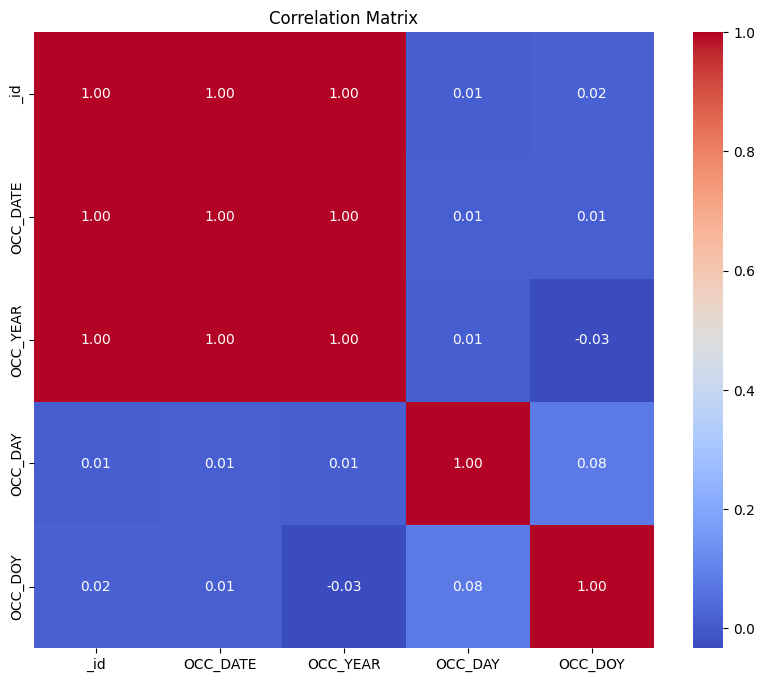

In [8]:
# Visualize corelation

import seaborn as sns
import matplotlib.pyplot as plt

data_correlation = data.corr(numeric_only=True)

# Plot correlation matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [9]:
# Show unique values of the 'OCC_YEAR' column
data['OCC_YEAR'].value_counts().sort_index()

OCC_YEAR
2004    64
2005    80
2006    70
2007    86
2008    70
2009    62
2010    65
2011    51
2012    57
2013    57
2014    58
2015    59
2016    75
2017    65
2018    98
2019    79
2020    71
2021    85
2022    71
2023    73
2024    18
Name: count, dtype: int64

# Data Cleaning and Transformation

In [11]:
# Filter data for data after 2013
data1 = data[data['OCC_YEAR'] > 2013]
data1['OCC_YEAR'].value_counts().sort_index()

OCC_YEAR
2014    58
2015    59
2016    75
2017    65
2018    98
2019    79
2020    71
2021    85
2022    71
2023    73
2024    18
Name: count, dtype: int64

In [12]:
# Get count and percentage of Null Values

data_null_count = data1.isnull().sum()
data_null_percentage = (data1.isnull().sum() / data1.shape[0]) * 100
null_values = pd.DataFrame({
    'Null Count': data_null_count,
    'Null Percentage': data_null_percentage
})
null_values

,Null Count,Null Percentage
_id,0,0.0
EVENT_UNIQUE_ID,0,0.0
OCC_DATE,0,0.0
OCC_YEAR,0,0.0
OCC_MONTH,0,0.0
OCC_DAY,0,0.0
OCC_DOW,0,0.0
OCC_DOY,0,0.0
DIVISION,0,0.0
HOMICIDE_TYPE,0,0.0


In [13]:
# Create a single column filled with dates by using the 'OCC_YEAR' and 'OCC_DOY' columns.

data1['OCC_FULL_DATE'] = data1.apply(lambda row: pd.to_datetime(f"{int(row['OCC_YEAR'])}-{int(row['OCC_DOY']):03d}", format='%Y-%j').date(), axis=1)


C:\Users\Robins\AppData\Local\Temp\ipykernel_8596\3803075061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['OCC_FULL_DATE'] = data1.apply(lambda row: pd.to_datetime(f"{int(row['OCC_YEAR'])}-{int(row['OCC_DOY']):03d}", format='%Y-%j').date(), axis=1)


In [51]:
# Drop the unnecessary columns
data2 = data1.drop(columns=[ 'OCC_DATE', 'HOOD_140', 'NEIGHBOURHOOD_140'], inplace=False)


In [52]:
# Save the DataFrame to an Excel file for use in Power BI for visualization
data2.to_excel('../Data/TOR_homicide.xlsx', index=False) 